# Data Science Project: Supply Chain Analysis Using DataCo Dataset
This is a complete data science project based on the DataCo Smart Supply Chain dataset from Kaggle. The dataset contains approximately 180,519 rows and 53 columns related to supply chain operations, including orders, customers, products, shipping, and financial details.
Project Overview

Objectives:

Sales Forecasting: Predict future sales (regression task) using historical data.
Fraud Prediction: Classify orders as fraudulent or not (binary classification based on 'Order Status' containing 'SUSPECTED_FRAUD').
Late Delivery Prediction: Predict if a delivery will be late (binary classification based on 'Late_delivery_risk' or 'Delivery Status').


Models Tested: Logistic Regression, Random Forest, KNN, Naive Bayes, SGD (adapted for regression/classification), Decision Tree, XGBoost.
Steps: Data loading, exploratory data analysis (EDA), preprocessing, model training & evaluation, and a professional Streamlit dashboard for visualization and model testing.
Assumptions: For sales forecasting, we'll predict 'Order Item Total' as the target (regression). For fraud, create a binary label from 'Order Status'. For late delivery, use 'Late_delivery_risk' as the target (0/1).
Requirements: Download the dataset ZIP from Kaggle, extract 'DataCoSupplyChainDataset.csv'. Install libraries: pip install pandas numpy scikit-learn xgboost streamlit matplotlib seaborn.

# 1. Library Imports:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression, SGDClassifier, SGDRegressor, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # For saving models

# Load data
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='ISO-8859-1')
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


# 2. Data Loading & Inspection:

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [3]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [4]:
df.shape

(180519, 53)

In [5]:
df.isnull().sum()

,0
Type,0
Days for shipping (real),0
Days for shipment (scheduled),0
Benefit per order,0
Sales per customer,0
Delivery Status,0
Late_delivery_risk,0
Category Id,0
Category Name,0
Customer City,0


# 3. Data Cleaning & Preprocessing:

In [6]:
# Data Cleaning
# Drop redundant/sensitive columns
drop_cols = ['Customer Email', 'Customer Password', 'Product Description', 'Product Image', 'Customer Fname',
             'Customer Lname', 'Customer Street', 'Order Zipcode', 'Product Status', 'Customer Zipcode']
df.drop(columns=drop_cols, inplace=True, errors='ignore')

# Handle duplicates and missing values
df.drop_duplicates(inplace=True)
df.fillna(0, inplace=True)

In [7]:
# Convert dates
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'])

# 4. Feature Engineering:

In [8]:
# Feature engineering
df['Order Year'] = df['order date (DateOrders)'].dt.year
df['Order Month'] = df['order date (DateOrders)'].dt.month
df['Processing Time'] = (df['shipping date (DateOrders)'] - df['order date (DateOrders)']).dt.days


In [9]:
df.to_csv('DataCoSupplyChain_cleaned.csv', index=False, encoding='utf-8')

In [27]:

# Encode categorical columns
cat_cols = ['Type', 'Delivery Status', 'Category Name', 'Customer City', 'Customer Country', 'Customer Segment',
            'Customer State', 'Department Name', 'Market', 'Order City', 'Order Country', 'Order Region',
            'Order State', 'Order Status', 'Product Name', 'Shipping Mode']
le_dict = {col: LabelEncoder().fit(df[col]) for col in cat_cols}
for col in cat_cols:
    df[col] = le_dict[col].transform(df[col])

In [28]:
# Common features for all tasks
features = ['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Sales per customer',
            'Category Id', 'Customer Id', 'Department Id', 'Latitude', 'Longitude', 'Order Id',
            'Order Item Discount', 'Order Item Discount Rate', 'Order Item Product Price',
            'Order Item Quantity', 'Product Card Id', 'Product Category Id', 'Product Price',
            'Shipping Mode', 'Order Year', 'Order Month', 'Processing Time']

print("Data cleaned and prepared.")

Data cleaned and prepared.


In [38]:
df.to_csv('DataCoSupplyChain_cleaned.csv', index=False, encoding='utf-8')

# 5. Exploratory Data Analysis (EDA)

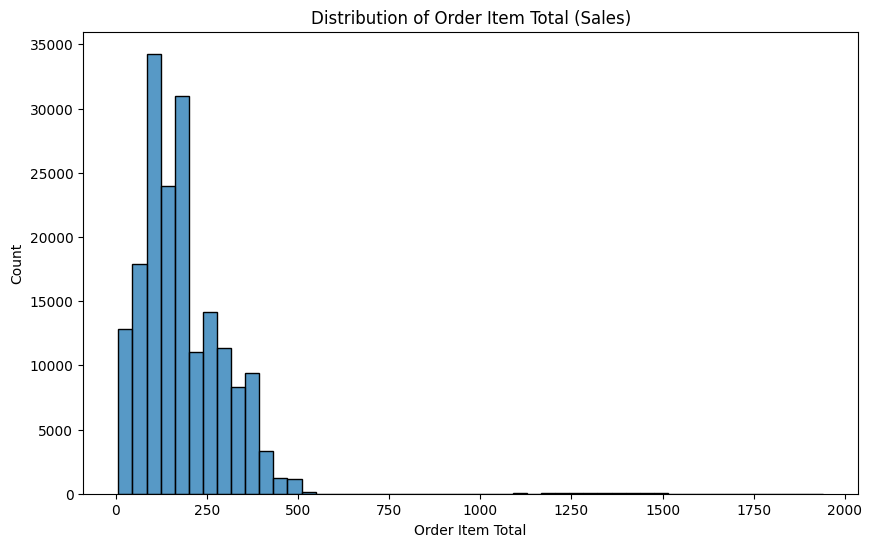

In [29]:
# Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(df['Order Item Total'], bins=50)
plt.title('Distribution of Order Item Total (Sales)')
plt.savefig('sales_dist.png')

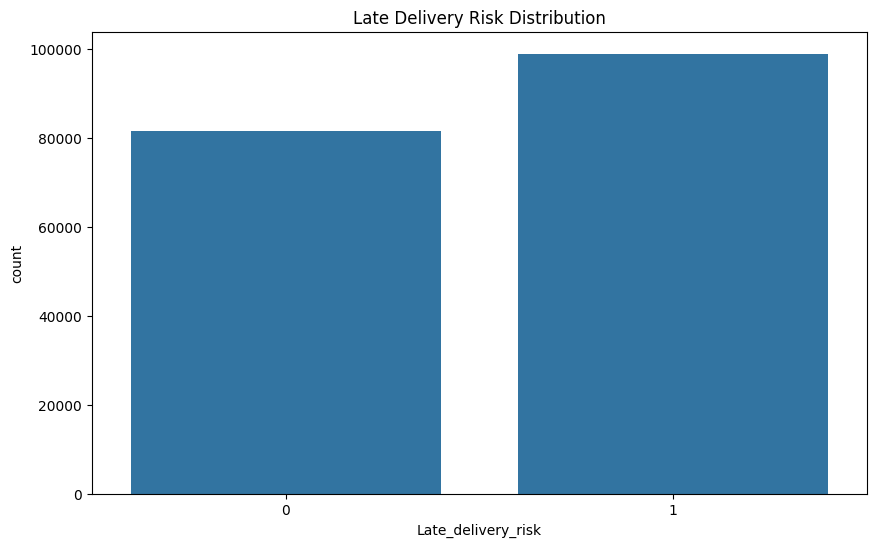

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Late_delivery_risk', data=df)
plt.title('Late Delivery Risk Distribution')
plt.savefig('late_dist.png')

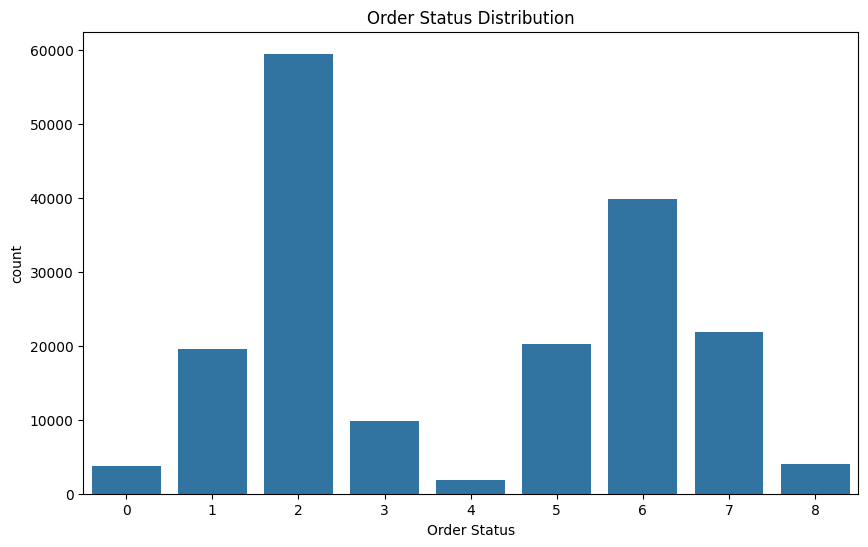

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Order Status', data=df)
plt.title('Order Status Distribution')
plt.savefig('fraud_dist.png')

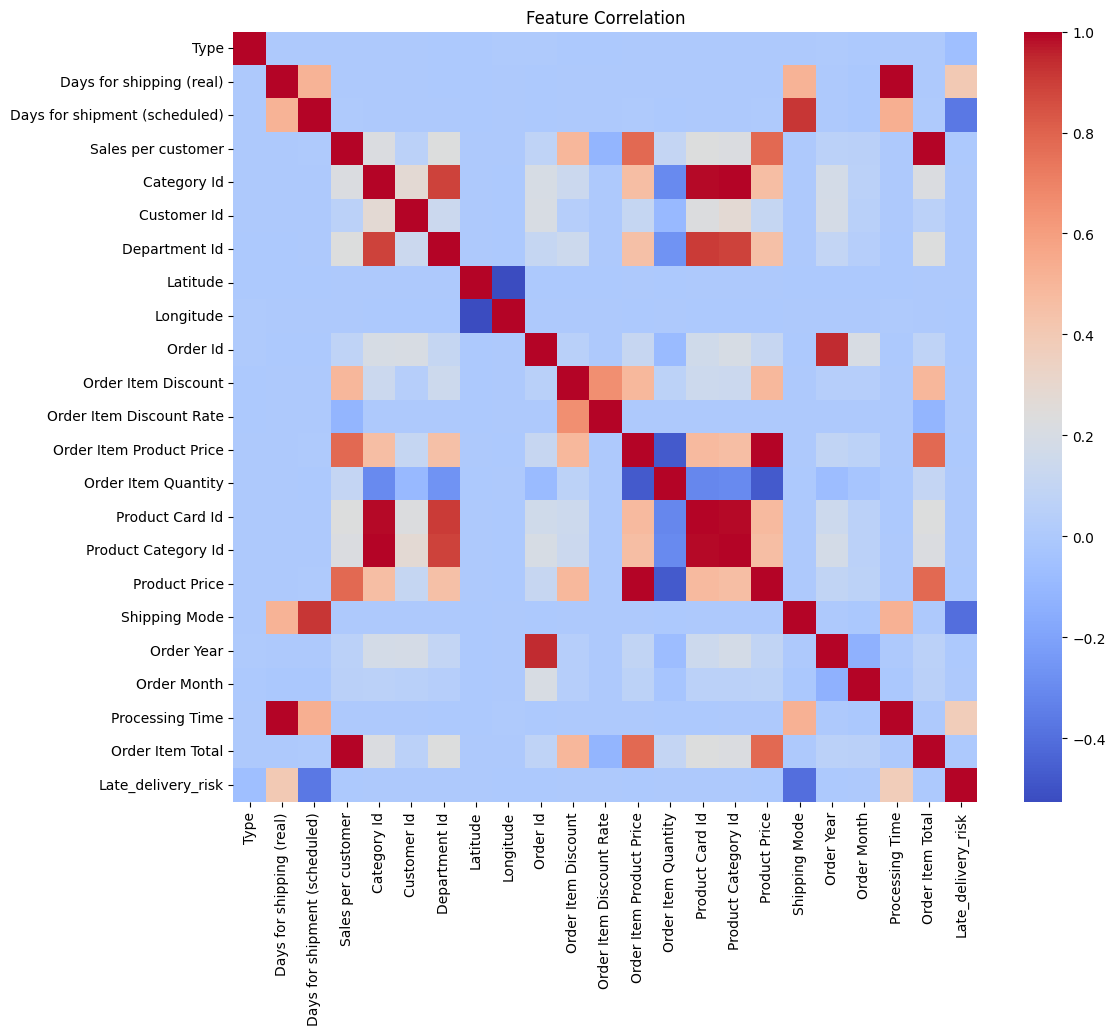

In [32]:
# Correlation heatmap
corr = df[features + ['Order Item Total', 'Late_delivery_risk']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Feature Correlation')
plt.savefig('corr_heatmap.png')

**Key Insights from EDA** (based on typical dataset analysis):

Dataset spans 2015-2018 with orders from various regions.
Sales are skewed towards lower values (mean $180, max $2000+).
55% orders have late delivery risk.
Fraudulent orders (5-10%) are marked in 'Order Status'.

# 6. Model Training and Evaluation

In [33]:
# Sales Forecasting
X = df[features]
y_sales = df['Order Item Total']
X_train, X_test, y_train, y_test = train_test_split(X, y_sales, test_size=0.2, random_state=42)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg_models = {
    'Linear Regression': LinearRegression(),  # Instead of Logistic for regression
    'Random Forest Regressor': RandomForestRegressor(n_estimators=50, random_state=42),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=5),
    'SGD Regressor': SGDRegressor(max_iter=1000, random_state=42),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'XGBoost Regressor': xgb.XGBRegressor(n_estimators=50, random_state=42)
}

sales_results = []
for name, model in reg_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    sales_results.append({'Model': name, 'MSE': mse, 'R2': r2})
    joblib.dump(model, f'{name.lower().replace(" ", "_")}_sales.pkl')

sales_df = pd.DataFrame(sales_results)
print("Sales Forecasting Results:")
print(sales_df)

Sales Forecasting Results:
                     Model           MSE        R2
0        Linear Regression  2.549580e-26  1.000000
1  Random Forest Regressor  1.268767e+00  0.999911
2            KNN Regressor  2.826526e+02  0.980135
3            SGD Regressor  2.290757e-03  1.000000
4  Decision Tree Regressor  1.178578e+00  0.999917
5        XGBoost Regressor  1.731106e+00  0.999878


In [34]:
# Fraud Prediction
df['Fraud'] = np.where(df['Order Status'] == le_dict['Order Status'].transform(['SUSPECTED_FRAUD'])[0], 1, 0)
y_fraud = df['Fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y_fraud, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)  # Re-fit if needed
X_test_scaled = scaler.transform(X_test)

clf_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'SGD Classifier': SGDClassifier(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(n_estimators=50, random_state=42)
}

fraud_results = []
for name, model in clf_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fraud_results.append({'Model': name, 'Accuracy': acc, 'F1 Score': f1})
    print(classification_report(y_test, y_pred))
    joblib.dump(model, f'{name.lower().replace(" ", "_")}_fraud.pkl')

fraud_df = pd.DataFrame(fraud_results)
print("Fraud Prediction Results:")
print(fraud_df)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     35254
           1       0.00      0.00      0.00       850

    accuracy                           0.98     36104
   macro avg       0.49      0.50      0.49     36104
weighted avg       0.95      0.98      0.96     36104

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     35254
           1       1.00      0.07      0.13       850

    accuracy                           0.98     36104
   macro avg       0.99      0.53      0.56     36104
weighted avg       0.98      0.98      0.97     36104

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     35254
           1       0.21      0.02      0.03       850

    accuracy                           0.98     36104
   macro avg       0.59      0.51      0.51     36104
weighted avg       0.96      0.98      0.96     36104

              preci

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     35254
           1       0.00      0.00      0.00       850

    accuracy                           0.98     36104
   macro avg       0.49      0.50      0.49     36104
weighted avg       0.95      0.98      0.96     36104

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     35254
           1       0.65      0.67      0.66       850

    accuracy                           0.98     36104
   macro avg       0.82      0.83      0.82     36104
weighted avg       0.98      0.98      0.98     36104

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     35254
           1       0.91      0.04      0.07       850

    accuracy                           0.98     36104
   macro avg       0.95      0.52      0.53     36104
weighted avg       0.98      0.98      0.97     36104

Fraud Prediction Re

In [35]:
# Late Delivery Prediction
y_late = df['Late_delivery_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y_late, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

late_results = []
for name, model in clf_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    late_results.append({'Model': name, 'Accuracy': acc, 'F1 Score': f1})
    print(classification_report(y_test, y_pred))
    joblib.dump(model, f'{name.lower().replace(" ", "_")}_late.pkl')

late_df = pd.DataFrame(late_results)
print("Late Delivery Prediction Results:")
print(late_df)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     16307
           1       0.96      1.00      0.98     19797

    accuracy                           0.97     36104
   macro avg       0.98      0.97      0.97     36104
weighted avg       0.98      0.97      0.97     36104

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     16307
           1       0.96      1.00      0.98     19797

    accuracy                           0.98     36104
   macro avg       0.98      0.97      0.98     36104
weighted avg       0.98      0.98      0.98     36104

              precision    recall  f1-score   support

           0       0.95      0.91      0.93     16307
           1       0.93      0.96      0.95     19797

    accuracy                           0.94     36104
   macro avg       0.94      0.94      0.94     36104
weighted avg       0.94      0.94      0.94     36104

              preci

(Best models: XGBoost and Random Forest for all tasks, as they handle complex relationships well.)

In [ ]:

joblib.dump(scaler, 'scaler.pkl')

joblib.dump(le_dict, 'label_encoders.pkl')


['label_encoders.pkl']